# Import all the Libraries

In [7]:
##Standard Imports
import os

##Third Party Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Local Importss

In [8]:
## Plotting Style
sns.set() 

# Load Data

In [10]:
## import inbuilt standard datasets from sklearn

from sklearn import datasets

In [12]:
## Load the Iris dataset

data=datasets.load_iris()

# Preview of the Data

In [15]:
## To print the description of the data

# print(data['DESCR'])  #REMOVE HASHTAG BEFORE PRINT FOR SEEING THE DESCRIPTION

In [17]:
## to preview the data

# data['data']

In [19]:
## to preview the feature names in the data

# data['feature_names']

In [21]:
## to preview the target

# data['target']

In [23]:
## to preview the target names

# data['target_names']

# Problem Statement

We are trying to predict the species of a flower by using the attributes of the flower (sepal length, sepal width, petal length, petal width)

This is a multiclass classification problem.

# Create a pandas dataframe from the data
 We can also use numpy and do our full analysis.

In [26]:
df= pd.DataFrame(data['data'], columns=data['feature_names'])

In [27]:
# Assign the target of the data to the datframe

df['target'] = data['target']

In [30]:
# to preview the first few rows of the data

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
# to preview the last few rows of the data

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Basic Descriptive Stastics

In [32]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distribution of Features and Target

# Histograms

Text(0.5, 0.98, 'sepal length (cm)')

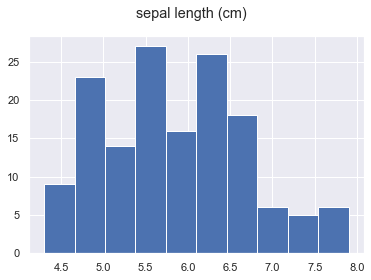

In [40]:
column = 'sepal length (cm)'

df[column].hist()  ## Plots the histogram of sepal length feature

plt.suptitle(column) ## Gives the title to the histogram

Text(0.5, 0.98, 'sepal width (cm)')

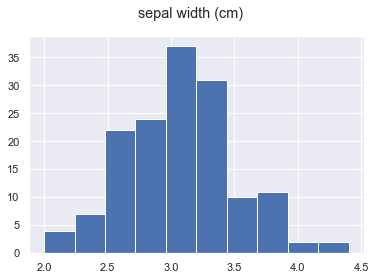

In [41]:
column = 'sepal width (cm)'

df[column].hist()  ## Plots the histogram of sepal length feature

plt.suptitle(column) ## Gives the title to the histogram

Text(0.5, 0.98, 'petal length (cm)')

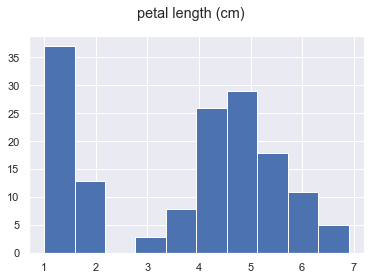

In [42]:
column = 'petal length (cm)'

df[column].hist()  ## Plots the histogram of sepal length feature

plt.suptitle(column) ## Gives the title to the histogram

Text(0.5, 0.98, 'petal width (cm)')

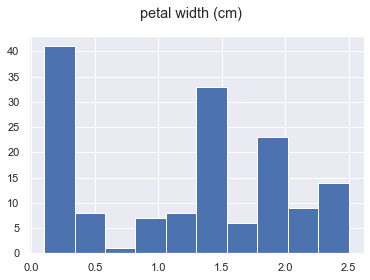

In [43]:
column = 'petal width (cm)'

df[column].hist()  ## Plots the histogram of sepal length feature

plt.suptitle(column) ## Gives the title to the histogram

# Relationship between the data features and target

In [46]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
# add a new column into the dataframe by mapping the numericle values to the respective flower type

df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

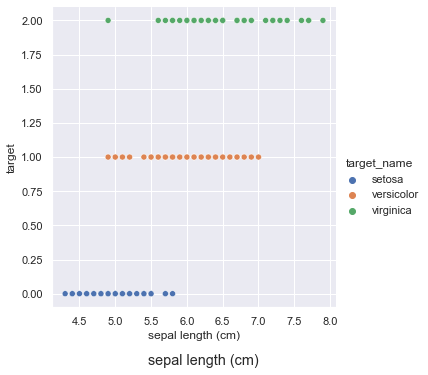

In [55]:
column = 'sepal length (cm)'

sns.relplot(x=column, y = 'target', hue='target_name', data= df)

plt.suptitle(column, y=0)


Text(0.5, 0, 'sepal width (cm)')

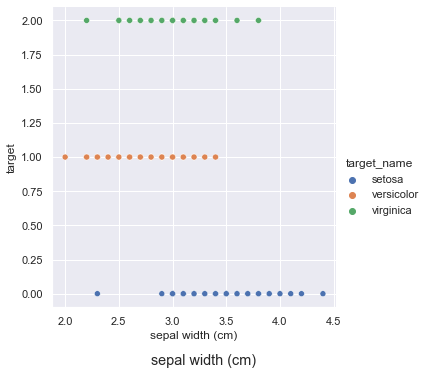

In [56]:
column = 'sepal width (cm)'

sns.relplot(x=column, y = 'target', hue='target_name', data= df)

plt.suptitle(column, y=0)


Text(0.5, 0, 'petal length (cm)')

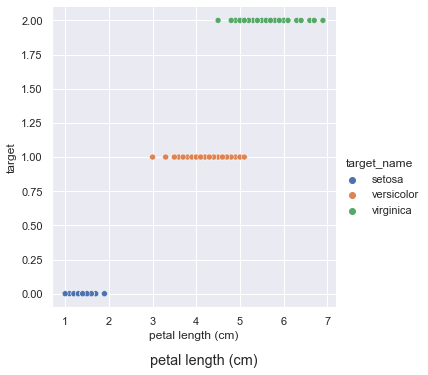

In [57]:
column = 'petal length (cm)'

sns.relplot(x=column, y = 'target', hue='target_name', data= df)

plt.suptitle(column, y=0)


Text(0.5, 0, 'petal width (cm)')

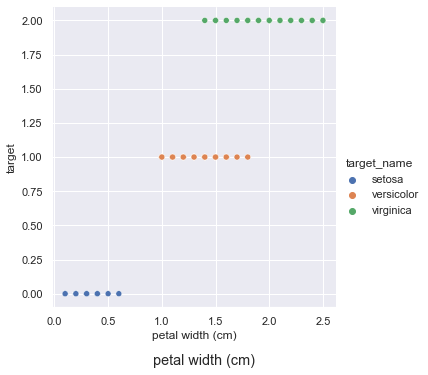

In [58]:
column = 'petal width (cm)'

sns.relplot(x=column, y = 'target', hue='target_name', data= df)

plt.suptitle(column, y=0)


# Exploratory Data Analysis (EDA)- Pairplots

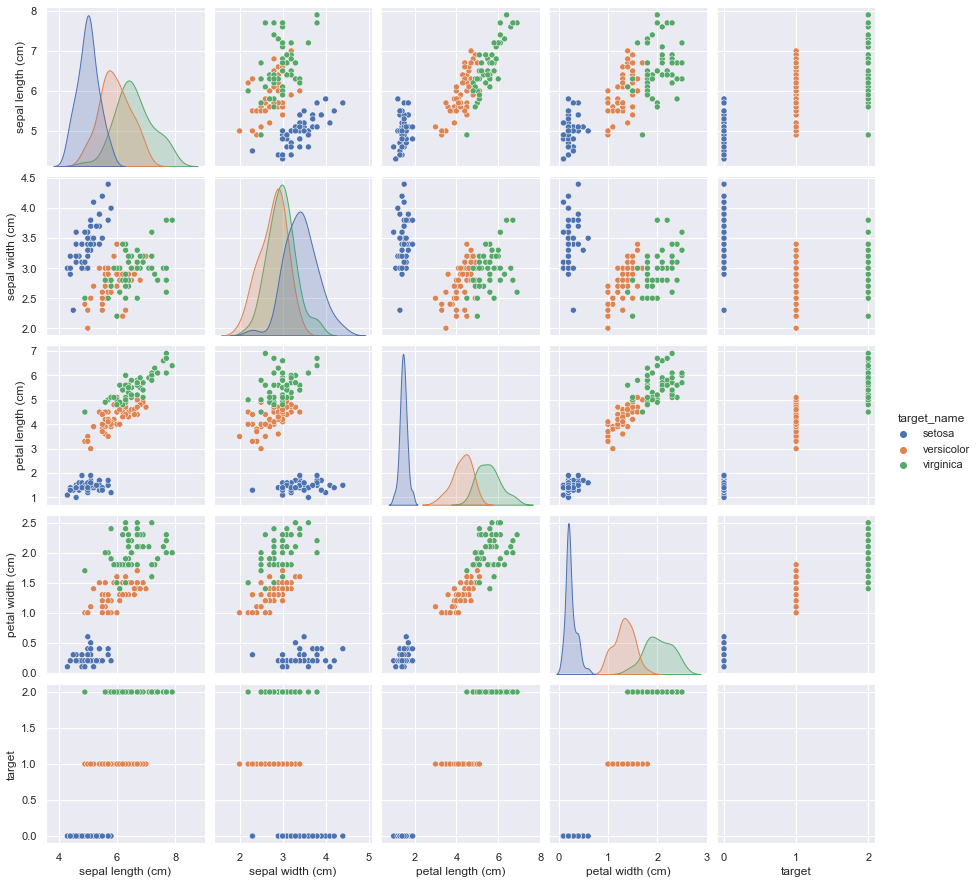

In [60]:
sns.pairplot(df, hue='target_name')

# Train - Test   Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
## Split the overall data into two subset: training data and test data

df_train, df_test= train_test_split(df, test_size=0.25)

In [64]:
df_train.shape

(112, 6)

In [66]:
df_test.shape

(38, 6)

# Prepare our data for modeling

In [67]:
X_train = df_train.drop(columns=['target', 'target_name']).values

In [70]:
y_train=df_train['target'].values

# Modeling - What is our baseline?

What is the accuracy that we can get by random guessing. If our model can not achieve more accuracy than random guessing then there is no point modeling.

# Simple manual model

Let's manually look at our data and decide some cutoff points for classififcation

In [71]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
def single_feature_prediction(petal_length):
    '''Predicts the Iris species given the petal length.'''
    if petal_length < 2.5:
        return 0
    elif petal_length <4.8:
        return 1
    else:
        return 2

In [76]:
X_train[:,2]

array([3.3, 4.6, 1.4, 1.4, 1.3, 5.6, 1.9, 4.7, 4.9, 4. , 4. , 4.7, 3.9,
       4.7, 4.4, 5.6, 4.3, 1.4, 1.7, 4.8, 1.6, 6.7, 4. , 6. , 1.5, 1.6,
       1.5, 5.1, 1.5, 1.7, 5.1, 4. , 4.1, 4.5, 1.5, 1.5, 1.7, 1.3, 1.4,
       1.4, 3.9, 5. , 5.4, 4.9, 6.3, 4.6, 4.7, 5.6, 1.5, 4.4, 4.1, 5.6,
       5. , 5.1, 6.4, 1.3, 5.5, 5.7, 4.8, 4.9, 6. , 4.8, 6.6, 3.5, 4.6,
       1.9, 4.2, 4.5, 5.1, 1.4, 6.1, 5.7, 1.7, 4. , 5.1, 6.1, 5.6, 1.2,
       1.5, 5. , 4.9, 4.2, 1.2, 1.5, 4.5, 4.5, 3.6, 5.9, 5.3, 5.7, 1.6,
       5.8, 1.6, 6.9, 5.9, 1.3, 4.5, 1.4, 3.7, 3.9, 1.4, 4.4, 3.3, 5.1,
       4.4, 4.3, 4.5, 4.8, 1.5, 1.4, 1.1, 6.1])

In [77]:
manual_y_predictions= np.array([single_feature_prediction(val) for val in X_train[:,2]])

In [79]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [80]:
print(f'Manual model accuracy: {manual_model_accuracy*100:.2f}%')

Manual model accuracy: 95.54%


# Modelling Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

### Use a validation set to evaluate our model

In [94]:
model = LogisticRegression()

In [98]:
## Xt stands for "X_train" , and Xv stands for "X_validation"

Xt, Xv, yt, yv = train_test_split(X_train,y_train, test_size=0.25)

In [99]:
model.fit(Xt, yt)

LogisticRegression()

In [102]:
y_pred = model.predict(Xv)

In [106]:
np.mean(y_pred == yv) ## to check the model score for cross validation set

0.9285714285714286

In [107]:
model.score(Xv, yv)

0.9285714285714286

### You should never evaluate your model on the same data that was used for training.

model.score(X_train,y_train) 

It is just for checking the model is better than manual predictions.

### Using cross validation to evaluate our model

In [110]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [111]:
model = LogisticRegression(max_iter=200)

In [146]:
cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

array([1.        , 1.        , 1.        , 1.        , 0.77777778,
       0.77777778, 0.77777778, 1.        , 1.        , 1.        ,
       1.        , 0.88888889])

In [148]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
np.mean(accuracies)

0.9462450592885375

### Where are we missclassifying points?

In [154]:
y_pred= cross_val_predict(model, X_train, y_train, cv=5)

In [157]:
predicted_correctly_mask = (y_pred == y_train)

In [158]:
not_predicted_correctly = ~predicted_correctly_mask

In [160]:
X_train[not_predicted_correctly]

array([[6.7, 3. , 5. , 1.7],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3. , 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8]])

In [164]:
df_predictions = df_train.copy()

In [165]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [166]:
df_predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction
93,5.0,2.3,3.3,1.0,1,versicolor,True
91,6.1,3.0,4.6,1.4,1,versicolor,True
1,4.9,3.0,1.4,0.2,0,setosa,True
6,4.6,3.4,1.4,0.3,0,setosa,True
2,4.7,3.2,1.3,0.2,0,setosa,True
...,...,...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,1,versicolor,False
27,5.2,3.5,1.5,0.2,0,setosa,True
8,4.4,2.9,1.4,0.2,0,setosa,True
13,4.3,3.0,1.1,0.1,0,setosa,True


In [167]:
df_predictions['prediction'] = y_pred

In [168]:
df_predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction
93,5.0,2.3,3.3,1.0,1,versicolor,True,1
91,6.1,3.0,4.6,1.4,1,versicolor,True,1
1,4.9,3.0,1.4,0.2,0,setosa,True,0
6,4.6,3.4,1.4,0.3,0,setosa,True,0
2,4.7,3.2,1.3,0.2,0,setosa,True,0
...,...,...,...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,1,versicolor,False,2
27,5.2,3.5,1.5,0.2,0,setosa,True,0
8,4.4,2.9,1.4,0.2,0,setosa,True,0
13,4.3,3.0,1.1,0.1,0,setosa,True,0


In [169]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [170]:
df_predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
93,5.0,2.3,3.3,1.0,1,versicolor,True,1,versicolor
91,6.1,3.0,4.6,1.4,1,versicolor,True,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa,True,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa,True,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa,True,0,setosa
...,...,...,...,...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,1,versicolor,False,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa,True,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa,True,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa,True,0,setosa


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

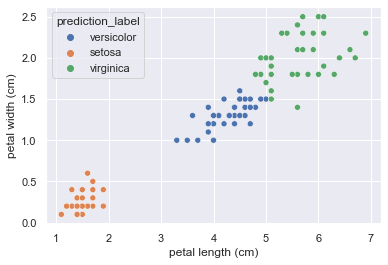

In [171]:
sns.scatterplot(x='petal length (cm)' , y= 'petal width (cm)' , hue= 'prediction_label', data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

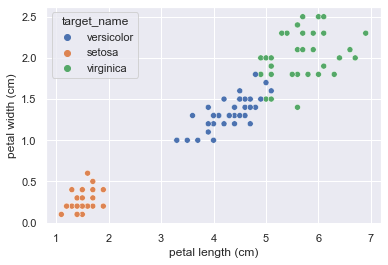

In [172]:
sns.scatterplot(x='petal length (cm)' , y= 'petal width (cm)' , hue= 'target_name', data=df_predictions)

In [191]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature , y= y_axis_feature , hue= 'prediction_label', data=df_predictions, ax = axs[0])
    sns.scatterplot(x=x_axis_feature , y= y_axis_feature , hue= 'target_name', data=df_predictions, ax = axs[1])
    sns.scatterplot(x=x_axis_feature , y= y_axis_feature , hue= 'correct_prediction', data=df_predictions, ax = axs[2])
    axs[3].set_visible(False)
    
    plt.show()

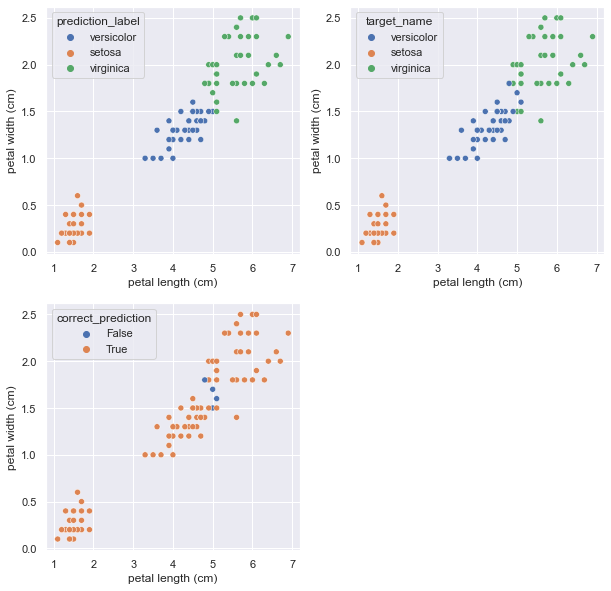

In [192]:
plot_incorrect_predictions(df_predictions, "petal length (cm)" , "petal width (cm)")

# Try out different models

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
model= RandomForestClassifier()  ## we can use different models

In [217]:
accs = cross_val_score(model, X_train, y_train, cv= 5, scoring= 'accuracy')

In [218]:
np.mean(accs)

0.9371541501976285

  # Model Tuning
  
  Model tuning is trying to determine the hyperparameters of your model that maximizes the model performance.

In [286]:
for reg_parameter in (0.1,0.3,0.6,1,2,4,5,7,10,15,100000):
    print(reg_parameter)
    model= LogisticRegression(max_iter=300,C=reg_parameter)
    accuracies = cross_val_score(model, X_train, y_train, cv= 5, scoring= 'accuracy')
    print(f"Accuracy:{np.mean(accuracies)*100:.2f}%")

0.1
Accuracy:92.85%
0.3
Accuracy:93.72%
0.6
Accuracy:93.72%
1
Accuracy:94.62%
2
Accuracy:95.53%
4
Accuracy:97.31%
5
Accuracy:97.31%
7
Accuracy:97.31%
10
Accuracy:97.31%
15
Accuracy:97.31%
100000
Accuracy:96.44%


# Final Model

In [287]:
model = LogisticRegression(max_iter=300, C=5)

# How does our model work on the test set ?

In [300]:
X_test = df_test.drop(columns=['target', 'target_name']).values
y_test = df_test['target'].values

## Train our final model using our full Training Dataset

In [301]:
X_train.shape

(112, 4)

In [302]:
y_train.shape

(112,)

In [313]:
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=300)

In [304]:
y_test_pred=model.predict(X_test)

In [305]:
test_set_correctly_classified= (y_test_pred == y_test)
test_set_accuracy= np.mean(test_set_correctly_classified)
print(f"Accuracy:{np.mean(test_set_accuracy)*100:.2f}%")

Accuracy:100.00%


In [308]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [309]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_prediction'] =test_set_correctly_classified
df_predictions_test['prediction']=y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0:'setosa', 1:'versicolor', 3:'virginica'})

In [311]:
df_predictions_test.shape

(38, 9)

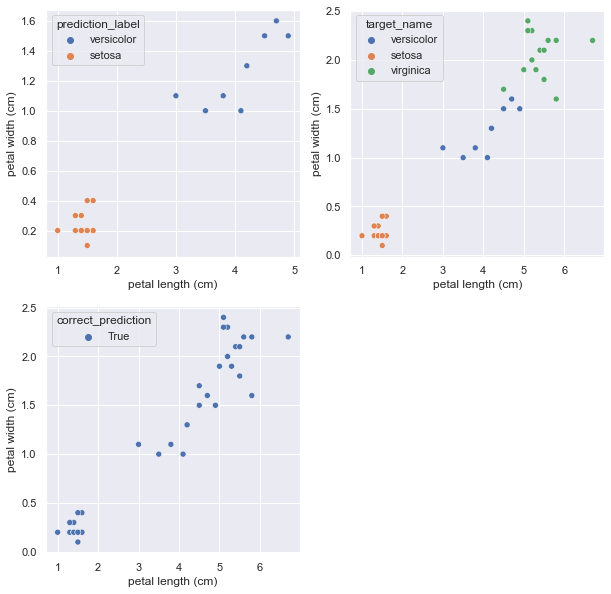

In [312]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

# Conclusion

#### 100% accuracy was achieved using LogisticRegression Classifier with below parameter:

LogisticRegression(C=5, max_iter=300)

